In [3]:
#Ryan Finegan Capital Markets Algorithms
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import math
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics as stats
from matplotlib import style
import warnings
import seaborn as sns
import requests
import bs4 as bs
import os
import csv
warnings.filterwarnings('ignore')

In [19]:
'''Correlations between big time technology companies like
google, microsoft, and apple & the overal market (SPY)'''
def changeDate_corr():
    end = dt.datetime.now()
    #change the number after the days=... 252 would be the amount of trading days in a year
    start = end - dt.timedelta(days=252)
    symbols_list = ['AAPL', 'TWTR', 'FB', 'SPY', 'AMZN', 'GOOGL', 'MSFT']
    symbols=[]
    for ticker in symbols_list: 
        r = web.DataReader(ticker,'yahoo',start,end)
        r['Symbol'] = ticker 
        symbols.append(r)
    df = pd.concat(symbols)
    df = df.reset_index()
    df = df[['Date', 'Adj Close', 'Symbol']]
    df.head()
    #just making the table easier to read by flipping it 
    df_pivot = df.pivot('Date','Symbol','Adj Close').reset_index()
    df_pivot.head()
    corr_df = df_pivot.corr(method='pearson')
    corr_df.head().reset_index()
    del corr_df.index.name
    print(corr_df.head(15))

In [20]:
changeDate_corr()

Symbol      AAPL      AMZN        FB     GOOGL      MSFT       SPY      TWTR
AAPL    1.000000  0.611116  0.650394  0.866249  0.923955  0.658554 -0.438764
AMZN    0.611116  1.000000  0.317713  0.541682  0.819728  0.317569 -0.078960
FB      0.650394  0.317713  1.000000  0.905139  0.569548  0.962890  0.156643
GOOGL   0.866249  0.541682  0.905139  1.000000  0.817531  0.924829 -0.041731
MSFT    0.923955  0.819728  0.569548  0.817531  1.000000  0.589973 -0.313995
SPY     0.658554  0.317569  0.962890  0.924829  0.589973  1.000000  0.181709
TWTR   -0.438764 -0.078960  0.156643 -0.041731 -0.313995  0.181709  1.000000


In [21]:
'''Correlation among the overal market(SPY) 
and mining/precious metals companies'''
def correlation():
    start = dt.datetime(2017, 1, 1)
    end = dt.datetime.now()
    #change the symbols_list to see new correlations
    symbols_list = ['GDXJ', 'AUY', 'HMY', 'SIL', 'SLVP', 'GOLD', 'SPY']
    symbols=[]
    for ticker in symbols_list: 
        r = web.DataReader(ticker,'yahoo',start,end)
        r['Symbol'] = ticker 
        symbols.append(r)
    df = pd.concat(symbols)
    df = df.reset_index()
    df = df[['Date', 'Adj Close', 'Symbol']]
    df.head()
    #just making the table easier to read by flipping it
    df_pivot = df.pivot('Date','Symbol','Adj Close').reset_index()
    df_pivot.head()
    #this actually makes the correlations between the stocks given the selected time frame
    corr_df = df_pivot.corr(method='pearson')
    corr_df.head().reset_index()
    del corr_df.index.name
    print(corr_df.head(20))

In [22]:
correlation()

Symbol       AUY      GDXJ      GOLD       HMY       SIL      SLVP       SPY
AUY     1.000000  0.806307  0.626129  0.808251  0.393057  0.492319  0.464931
GDXJ    0.806307  1.000000  0.677426  0.814767  0.614550  0.710471  0.309361
GOLD    0.626129  0.677426  1.000000  0.833802 -0.007953  0.072694  0.599291
HMY     0.808251  0.814767  0.833802  1.000000  0.269615  0.344676  0.515135
SIL     0.393057  0.614550 -0.007953  0.269615  1.000000  0.975633 -0.437132
SLVP    0.492319  0.710471  0.072694  0.344676  0.975633  1.000000 -0.302980
SPY     0.464931  0.309361  0.599291  0.515135 -0.437132 -0.302980  1.000000


In [11]:
def lowRSI_linearUp(t1,t2,t3):
    '''Checks if one of or all three of the stocks are having positive yearly
    returns and are currently oversold according to my stochastic oscillator 
    which would result in a buy.'''
    #would like to pair it with % of analysts that think the stock is a buy
    #https://www.tradingview.com/markets/stocks-usa/market-movers-most-volatile/
    start = dt.datetime(2016,1,1)
    end = dt.datetime.now()
    df1 = web.DataReader(t1,'yahoo',start,end)
    df2 = web.DataReader(t2,'yahoo',start,end)
    df3 = web.DataReader(t3,'yahoo',start,end)
    #recent close of ticker 1,2,& 3
    recentClose1 = df1.tail(1)
    recentClose2 = df2.tail(1)
    recentClose3 = df3.tail(1)
    #recent Adj close of 1 and 2 
    c1 = (recentClose1['Adj Close'].mean())
    c2 = (recentClose2['Adj Close'].mean())
    c3 = (recentClose3['Adj Close'].mean())
    #day 14 stats of all tickers
    day14prices1 = df1.tail(14)
    day14prices2 = df2.tail(14)
    day14prices3 = df3.tail(14)
    #lowest and highest Adj Closes of the last 14 trading sessions
    L14_t1 = (day14prices1['Low'].min())
    H14_t1 = (day14prices1['High'].max())
    L14_t2 = (day14prices2['Low'].min())
    H14_t2 = (day14prices2['High'].max())
    L14_t3 = (day14prices3['Low'].min())
    H14_t3 = (day14prices3['High'].max())
    #K formula for all tickers
    #Shows the RSI for all stocks 
    #will see if any are oversold of it is below 30
    K1 = 100*((c1-L14_t1)/(H14_t1-L14_t1))
    K2 = 100*((c2-L14_t2)/(H14_t2-L14_t2))
    K3 = 100*((c3-L14_t3)/(H14_t3-L14_t3))
    #Year returns of the first stock
    df1historyYear = df1.tail(252)
    df1recent = df1.tail(1)
    df1recentAdjClose = (df1recent['Adj Close'].mean())
    df1initial = df1historyYear.head(1)
    df1initialAdjClose = (df1initial['Adj Close'].mean())
    t1yearReturns = (100*(df1recentAdjClose - df1initialAdjClose)/df1initialAdjClose)
    print(f'The yearly historical return of {t1} is {t1yearReturns}')
    #Year returns of the second stock
    df2historyYear = df2.tail(252)
    df2recent = df2.tail(1)
    df2recentAdjClose = (df2recent['Adj Close'].mean())
    df2initial = df2historyYear.head(1)
    df2initialAdjClose = (df2initial['Adj Close'].mean())
    t2yearReturns = (100*(df2recentAdjClose - df2initialAdjClose)/df2initialAdjClose)
    print(f'The yearly historical return of {t2} is {t2yearReturns}')
    #Year returns of the thrid stock
    df3historyYear = df3.tail(252)
    df3recent = df3.tail(1)
    df3recentAdjClose = (df3recent['Adj Close'].mean())
    df3initial = df3historyYear.head(1)
    df3initialAdjClose = (df3initial['Adj Close'].mean())
    t3yearReturns = (100*(df3recentAdjClose - df3initialAdjClose)/df3initialAdjClose)
    print(f'The yearly historical return of {t3} is {t3yearReturns}')
    if K1 <= 30 and K2 <= 30 and K3 <= 30 and t1yearReturns>=0 and t2yearReturns>=0 and t3yearReturns>=0:
        print(f'BUY ALL: {t1} is {K1} and {t2} is {K2} and {t3} is {K3}\nALL HAVE POSITIVE YEARLY RETURNS.')
    elif K1 <= 30 and t1yearReturns>=0:
        print(f'BUY: {t1} is {K1} and it is a positive yearly earnings of {t1yearReturns}. \n{t2} is {K2} and {t3} is {K3}')
    elif K2 <= 30 and t2yearReturns>=0:
        print(f'BUY: {t2} is {K2} and it is a positive yearly earnings of {t2yearReturns}. \n{t1} is {K1} and {t3} is {K3}')
    elif K3 <= 30 and t3yearReturns>=0:
        print(f'BUY: {t3} is {K3} and it is a positive yearly earnings of {t3yearReturns}. \n{t1} is {K1} and {t2} is {K2}')
    else:
        print(f'{t1} is {K1} and {t2} is {K2} and {t3} is {K3}.')

In [12]:
lowRSI_linearUp('ETH-USD','DOGE-USD','LTC-USD')

The yearly historical return of ETH-USD is -21.855168398987335
The yearly historical return of DOGE-USD is -30.93655177663923
The yearly historical return of LTC-USD is -53.2237680635466
ETH-USD is 91.66525627040694 and DOGE-USD is 91.38498663882298 and LTC-USD is 89.75274748326947.


In [13]:
lowRSI_linearUp('SIL','SLVP','VKTX')

The yearly historical return of SIL is -2.5059964298965487
The yearly historical return of SLVP is -7.402599520505361
The yearly historical return of VKTX is -53.31355142950691
SIL is 74.78259777591282 and SLVP is 69.13791626443809 and VKTX is 75.91622644524112.


In [14]:
lowRSI_linearUp('GDXJ','AUY','HMY')

The yearly historical return of GDXJ is -1.518379124858398
The yearly historical return of AUY is 27.16736103793669
The yearly historical return of HMY is 14.663465285795112
GDXJ is 68.72157252880768 and AUY is 83.8235328491722 and HMY is 52.966098698416474.


In [15]:
lowRSI_linearUp('AAPL','MSFT','GOOG')

The yearly historical return of AAPL is 33.423062442083854
The yearly historical return of MSFT is 40.89071392005647
The yearly historical return of GOOG is 0.12445105319482147
AAPL is 84.83665558603526 and MSFT is 88.95410922737513 and GOOG is 87.58180536658213.


In [16]:
lowRSI_linearUp('TSLA','VKTX','SIL')

The yearly historical return of TSLA is 103.12059077531079
The yearly historical return of VKTX is -53.46191806645025
The yearly historical return of SIL is -2.5059964298965487
TSLA is 94.24696246385328 and VKTX is 74.60733746758672 and SIL is 74.78259777591282.


In [23]:
def historicalPrices(ticker):
    #stats for historical adj close prices for 30,90,252,504 days
    plt.style.use('ggplot')
    start = dt.datetime(2016,1,1)
    end = dt.datetime.now()
    df = web.DataReader(ticker, 'yahoo', start, end)
    day30prices = df.tail(30)
    day90prices = df.tail(90)
    yrPrices = df.tail(252)
    yr2Prices = df.tail(504)
    print(day30prices['Adj Close'].describe())
    print(day90prices['Adj Close'].describe())
    print(yrPrices['Adj Close'].describe())
    print(yr2Prices['Adj Close'].describe())

In [24]:
historicalPrices('VKTX')

count    30.000000
mean      4.880333
std       0.846805
min       3.450000
25%       4.320000
50%       4.660000
75%       5.750000
max       6.440000
Name: Adj Close, dtype: float64
count    90.000000
mean      6.474500
std       1.335058
min       3.450000
25%       5.830000
50%       6.745000
75%       7.553750
max       8.730000
Name: Adj Close, dtype: float64
count    252.000000
mean       7.229266
std        1.160807
min        3.450000
25%        6.687500
50%        7.325000
75%        8.020000
max       10.130000
Name: Adj Close, dtype: float64
count    504.000000
mean       8.534196
std        2.769648
min        3.450000
25%        6.917500
50%        8.055000
75%        9.975000
max       19.650000
Name: Adj Close, dtype: float64


In [61]:
def volatility(ticker):
    #returns std for ticker on yahoo API
    plt.style.use('ggplot')
    start = dt.datetime(2016,1,1)
    end = dt.datetime.now()
    df = web.DataReader(ticker, 'yahoo', start, end)
    day30prices = df.tail(30)
    day90prices = df.tail(90)
    yrPrices = df.tail(252)
    yr2Prices = df.tail(504)
    day30std = (day30prices['Adj Close'].std())
    day90std = (day90prices['Adj Close'].std())
    yrStd = (yrPrices['Adj Close'].std())
    yr2Std = (yr2Prices['Adj Close'].std())
    print(f'{ticker} volatility\n30 days: {day30std} \n90 day: {day90std} \nyear: {yrStd} \n2 year: {yr2Std}') 

In [62]:
volatility('TSLA')

TSLA volatility
30 days; 40.482250323237004 
90 day: 40.956580155656155 
year: 47.5644938697185 
2 year: 44.328577388167616


In [42]:
def stochastic(ticker):
    start = dt.datetime(2016,1,1)
    end = dt.datetime.now()
    df = web.DataReader(ticker, 'yahoo', start, end)
    recentClose = df.tail(1)
    c = (recentClose['Adj Close'].mean())
    day3prices = df.tail(3)
    day14prices = df.tail(14)
    day28prices = df.tail(28)
    yrPrices = df.tail(252)
    yr2Prices = df.tail(504)
    L14 = (day14prices['Low'].min())
    L28 = (day28prices['Low'].min())
    lowYear = (yrPrices['Low'].min())
    low2Year = (yr2Prices['Low'].min())
    H14 = (day14prices['High'].max())
    K = 100*((c-L14)/(H14-L14))
    print(f'K of {ticker} is {K}.')
    L3 = (day3prices['Low'].min())
    H3 = (day3prices['High'].max())
    #this is the d line that makes more sense
    D = 100*((c-L3)/(H3-L3))
    #This is what investopedia said the d line should have been
    #100*(H3/L3)
    print(f'D of {ticker} is {D}')

In [43]:
stochastic('AUY')

K of AUY is 83.32560782900391.
D of AUY is 60.16670772768333


In [55]:
def meanReversion(ticker):
    #would want more than just the adj close 
    #would like mean of each day but the api I have I can't find that option
    #using mean of adj close of time periods and seeing if most recent adj close is lower 
    #would buy if it is lower than the mean or for a better term, moving average
    start = dt.datetime(2016,1,1)
    end = dt.datetime.now()
    df = web.DataReader(ticker, 'yahoo', start, end)
    recentClose = df.tail(1)
    c = (recentClose["Adj Close"].mean())
    day3 = df.tail(3)
    day30 = df.tail(30)
    day90 = df.tail(90)
    day252 = df.tail(252)
    day504 = df.tail(504)
    day3mean = (day3['Adj Close'].mean())
    day30mean = (day30['Adj Close'].mean())
    day90mean = (day90['Adj Close'].mean())
    day252mean = (day252['Adj Close'].mean())
    day504mean = (day504['Adj Close'].mean())
    if day3mean>c:
        print(f'The closing price of {ticker} is {c} and it is lower than the 3 day mean of {day3mean}')
    if day30mean>c:
        print(f'The closing price of {ticker} is {c} and it is lower than the 30 day mean of {day30mean}')
    if day90mean>c:
        print(f'The closing price of {ticker} is {c} and it is lower than the 90 day mean of {day90mean}')
    if day252mean>c:
        print(f'The closing price of {ticker} is {c} and it is lower than the yearly mean of {day252mean}')
    if day504mean>c:
        print(f'The closing price of {ticker} is {c} and it is lower than the 2 year mean of {day504mean}')
    else:
        print(f'The closing price of {ticker} is {c} and it is greater than the 3 day mean of {day3mean}')

In [56]:
meanReversion('VKTX')

The closing price of VKTX is 7.445000171661377 and it is lower than the yearly mean of 8.011805553284903
The closing price of VKTX is 7.445000171661377 and it is lower than the 2 year mean of 8.27322418727572


In [43]:
def weightedAverage(ticker):
    #50 day moving average and 200 day moving averages
    #buy when the 200 day moving average crosses over 50 day moving average
    #in other words buy when 50 day moving average is below 200 day moving average 
    #works for company that is in a simple upward trend
    start = dt.datetime(2016,1,1)
    end = dt.datetime.now()
    df = web.DataReader(ticker, 'yahoo', start, end)
    df50day = df.tail(50)
    dfMA50day = (df50day['Adj Close'].mean())
    df200day = df.tail(200)
    dfMA200day = (df200day['Adj Close'].mean())
    if dfMA50day < dfMA200day:
        print(f'BUY:\n{ticker}: \n50 day moving average: {dfMA50day}\n200 day moving average: {dfMA200day}')
    else:
        print(f'NOTHING:\n{ticker}: \n50 day moving average: {dfMA50day}\n200 day moving average: {dfMA200day}')

In [45]:
weightedAverage('TSLA')

NOTHING:
TSLA: 
50 day moving average: 289.34546844482423
200 day moving average: 255.84516662597656


In [23]:
def similarCompanies(ticker1, ticker2):
    #algorithm works when the two companies or stocks are similar
    #in other words have similar moving standard deviations
    start = dt.datetime(2016,1,1)
    end = dt.datetime.now()
    df1 = web.DataReader(ticker1, 'yahoo', start, end)
    df2 = web.DataReader(ticker2, 'yahoo', start, end)
    df1_20day = df1.tail(20)
    df2_20day = df2.tail(20)
    day20stdTicker1 = (df1_20day['Adj Close'].std())
    day20stdTicker2 = (df2_20day['Adj Close'].std())
    df1_200day = df1.tail(200)
    df2_200day = df2.tail(200)
    day200stdTicker1 = (df1_200day['Adj Close'].std())
    day200stdTicker2 = (df2_200day['Adj Close'].std())
    print(f'{ticker1}:{day20stdTicker1}')
    print(f'{ticker2}:{day20stdTicker2}')
    print(f'{ticker1}:{day200stdTicker1}')
    print(f'{ticker2}:{day200stdTicker2}')

In [24]:
similarCompanies('GOOG', 'AAPL')

GOOG:18.45093074077993
AAPL:6.260732656422809
GOOG:63.98236892269351
AAPL:24.936763255928877


In [25]:
def highVol_RSI(t1,t2,t3):
    '''Takes three tickers as an input and returns the volatilities of all 
    stocks and returns the stats of all, but also gives the advice of the better
    option according to relative strength index, mean reversion and volatility.
    If the stock is extremely volatile in a short amount of time and has a low
    RSI or is below the moving average => that will be the ideal pick'''
    #My Picks: GDXJ, GDX, TSLA, AUY, VYM, USD, SLV, SLVP, SIL
    #COMMS: XLC, FCOM, IXP
    #CONSUMER CYCLICAL: RCD, FDIS, XLY
    #CONSUMER DEFENSIVE: FSTA, VDC, RHS
    #EQUITY ENERGY: VDE, FENY, RYE
    #FINANCIAL: FNCL, RYF, VFH
    #HEALTH: FHLC, RYH, XLV
    #INDUSTRIALS: FIDU, RGI, VIS
    #INFRASTGRUCTURE: PAVE, TOLZ, GII
    #MISCELLANEOUS: XT, FIW, ICLN
    #NAT_RES: FMAT, RTM, VAW
    #REAL_ESTATE: USRT, FREL, BBRE
    #TECH: RYT, FTEC, XSW
    #UTILITIES: FUTY, VPU, RYU
    #would like to use this on a well established volatile ETF or stock like TSLA
    start = dt.datetime(2016,1,1)
    end = dt.datetime.now()
    #data collection into two data frames
    df1 = web.DataReader(t1,'yahoo',start,end)
    df2 = web.DataReader(t2,'yahoo',start,end)
    df3 = web.DataReader(t3,'yahoo',start,end)
    #volatility for first ticker
    df1_30day = df1.tail(30)
    df1_90day = df1.tail(90)
    df1_year = df1.tail(252)
    df1_sigma30day = 100*(df1_30day['Adj Close'].std())
    df1_sigma90day = 100*(df1_90day['Adj Close'].std())
    df1_sigmaYear = 100*(df1_year['Adj Close'].std())
    print(f'{t1} volatility in the past 30 days: {df1_sigma30day}')
    print(f'{t1} volatility in the past 90 days: {df1_sigma90day}')
    print(f'{t1} volatility in the past year: {df1_sigmaYear}')
    #volatility for second ticker
    df2_30day = df2.tail(30)
    df2_90day = df2.tail(90)
    df2_year = df2.tail(252)
    df2_sigma30day = 100*(df2_30day['Adj Close'].std())
    df2_sigma90day = 100*(df2_90day['Adj Close'].std())
    df2_sigmaYear = 100*(df2_year['Adj Close'].std())
    print(f'{t2} volatility in the past 30 days: {df2_sigma30day}')
    print(f'{t2} volatility in the past 90 days: {df2_sigma90day}')
    print(f'{t2} volatility in the past year: {df2_sigmaYear}')
    #volatility for third ticker
    df3_30day = df3.tail(30)
    df3_90day = df3.tail(90)
    df3_year = df3.tail(252)
    df3_sigma30day = 100*(df3_30day['Adj Close'].std())
    df3_sigma90day = 100*(df3_90day['Adj Close'].std())
    df3_sigmaYear = 100*(df3_year['Adj Close'].std())
    print(f'{t3} volatility in the past 30 days: {df3_sigma30day}')
    print(f'{t3} volatility in the past 90 days: {df3_sigma90day}')
    print(f'{t3} volatility in the past year: {df3_sigmaYear}')
    #recent close of ticker 1,2,& 3
    recentClose1 = df1.tail(1)
    recentClose2 = df2.tail(1)
    recentClose3 = df3.tail(1)
    #recent Adj close of 1 and 2 
    c1 = (recentClose1['Adj Close'].mean())
    c2 = (recentClose2['Adj Close'].mean())
    c3 = (recentClose3['Adj Close'].mean())
    #day 14 stats of all tickers
    day14prices1 = df1.tail(14)
    day14prices2 = df2.tail(14)
    day14prices3 = df3.tail(14)
    #lowest and highest Adj Closes of the last 14 trading sessions
    L14_t1 = (day14prices1['Low'].min())
    H14_t1 = (day14prices1['High'].max())
    L14_t2 = (day14prices2['Low'].min())
    H14_t2 = (day14prices2['High'].max())
    L14_t3 = (day14prices3['Low'].min())
    H14_t3 = (day14prices3['High'].max())
    #K formula for all tickers
    #Shows the RSI for all stocks 
    #will see if any are oversold of it is below 30
    K1 = 100*((c1-L14_t1)/(H14_t1-L14_t1))
    K2 = 100*((c2-L14_t2)/(H14_t2-L14_t2))
    K3 = 100*((c3-L14_t3)/(H14_t3-L14_t3))
    if K1 <= 30 or K2 <= 30 or K3 <= 30:
        print(f'BUY: {t1} is {K1} with a 30 day sigma of {df1_sigma30day} \nand {t2} is {K2} with a 30 day sigma of {df2_sigma30day} \nand {t3} is {K3} with a 30 day sigma of {df3_sigma30day}')
    else:
        print(f'{t1} is {K1} with a 30 day sigma of {df1_sigma30day} \nand {t2} is {K2} with a 30 day sigma of {df2_sigma30day} \nand {t3} is {K3} with a 30 day sigma of {df3_sigma30day}')

In [26]:
highVol_RSI('LTC-USD', 'FREL', 'BBRE')

LTC-USD volatility in the past 30 days: 466.44558865042853
LTC-USD volatility in the past 90 days: 1455.8667628113162
LTC-USD volatility in the past year: 1459.9656077247898
FREL volatility in the past 30 days: 347.20692642769416
FREL volatility in the past 90 days: 329.939895918609
FREL volatility in the past year: 210.6060510946438
BBRE volatility in the past 30 days: 1177.889039970627
BBRE volatility in the past 90 days: 1156.850920270542
BBRE volatility in the past year: 738.8160457561659
LTC-USD is 88.44714465412643 with a 30 day sigma of 466.44558865042853 
and FREL is 84.9810026565096 with a 30 day sigma of 347.20692642769416 
and BBRE is 86.7238988717418 with a 30 day sigma of 1177.889039970627


In [27]:
highVol_RSI('GOOG','LTC','VKTX')

GOOG volatility in the past 30 days: 10619.893022542592
GOOG volatility in the past 90 days: 13146.796611945996
GOOG volatility in the past year: 11899.479850816888
LTC volatility in the past 30 days: 822.0483706198014
LTC volatility in the past 90 days: 704.6062606463751
LTC volatility in the past year: 503.585625761797
VKTX volatility in the past 30 days: 84.68920071083504
VKTX volatility in the past 90 days: 133.52089105319104
VKTX volatility in the past year: 116.08943736563928
GOOG is 86.21634773854379 with a 30 day sigma of 10619.893022542592 
and LTC is 82.52891607584205 with a 30 day sigma of 822.0483706198014 
and VKTX is 70.68936678017556 with a 30 day sigma of 84.68920071083504


In [28]:
highVol_RSI('SLV', 'SIL', 'SLVP')

SLV volatility in the past 30 days: 168.49170154257666
SLV volatility in the past 90 days: 153.37403802095108
SLV volatility in the past year: 136.12242743336282
SIL volatility in the past 30 days: 326.84704175454107
SIL volatility in the past 90 days: 347.33728217495485
SIL volatility in the past year: 313.0501558313599
SLVP volatility in the past 30 days: 121.59958373171067
SLVP volatility in the past 90 days: 125.50353987026928
SLVP volatility in the past year: 107.55321661314699
SLV is 89.96866028472115 with a 30 day sigma of 168.49170154257666 
and SIL is 71.55280465573183 with a 30 day sigma of 326.84704175454107 
and SLVP is 66.23447134628061 with a 30 day sigma of 121.59958373171067


In [6]:
def historicPortReturnYear(t1,w1,t2,w2,t3,w3,t4,w4,t5,w5):
    '''Inputs stock, then wieght...repeats 4 more times
    Returns the historical protfolio return'''
    #select 10 stocks. returns historic return
    start = dt.datetime(2016,1,1)
    end = dt.datetime.now()
    #All the dataframes
    df1 = web.DataReader(t1, 'yahoo', start, end)
    df2 = web.DataReader(t2, 'yahoo', start, end)
    df3 = web.DataReader(t3, 'yahoo', start, end)
    df4 = web.DataReader(t4, 'yahoo', start, end)
    df5 = web.DataReader(t5, 'yahoo', start, end)
    #Year returns of the first stock
    df1historyYear = df1.tail(252)
    df1recent = df1.tail(1)
    df1recentAdjClose = (df1recent['Adj Close'].mean())
    df1initial = df1historyYear.head(1)
    df1initialAdjClose = (df1initial['Adj Close'].mean())
    t1yearReturns = (100*(df1recentAdjClose - df1initialAdjClose)/df1initialAdjClose)
    print(f'The yearly historical return of {t1} is {t1yearReturns}')
    #Year returns of the second stock
    df2historyYear = df2.tail(252)
    df2recent = df2.tail(1)
    df2recentAdjClose = (df2recent['Adj Close'].mean())
    df2initial = df2historyYear.head(1)
    df2initialAdjClose = (df2initial['Adj Close'].mean())
    t2yearReturns = (100*(df2recentAdjClose - df2initialAdjClose)/df2initialAdjClose)
    print(f'The yearly historical return of {t2} is {t2yearReturns}')
    #Year returns of the thrid stock
    df3historyYear = df3.tail(252)
    df3recent = df3.tail(1)
    df3recentAdjClose = (df3recent['Adj Close'].mean())
    df3initial = df3historyYear.head(1)
    df3initialAdjClose = (df3initial['Adj Close'].mean())
    t3yearReturns = (100*(df3recentAdjClose - df3initialAdjClose)/df3initialAdjClose)
    print(f'The yearly historical return of {t3} is {t3yearReturns}')
    #Year return of the fourth stock
    df4historyYear = df4.tail(252)
    df4recent = df4.tail(1)
    df4recentAdjClose = (df4recent['Adj Close'].mean())
    df4initial = df4historyYear.head(1)
    df4initialAdjClose = (df4initial['Adj Close'].mean())
    t4yearReturns = (100*(df4recentAdjClose - df4initialAdjClose)/df4initialAdjClose)
    print(f'The yearly historical return of {t4} is {t4yearReturns}')
    #Year return of the fifth stock
    df5historyYear = df5.tail(252)
    df5recent = df5.tail(1)
    df5recentAdjClose = (df5recent['Adj Close'].mean())
    df5initial = df5historyYear.head(1)
    df5initialAdjClose = (df5initial['Adj Close'].mean())
    t5yearReturns = (100*(df5recentAdjClose - df5initialAdjClose)/df5initialAdjClose)
    print(f'The yearly historical return of {t5} is {t5yearReturns}')
    '''w1 = input(f'What is the weight of {t1}(0-1): ')
    w2 = input(f'What is the weight of {t2}(0-1): ')
    w3 = input(f'What is the weight of {t3}(0-1): ')
    w4 = input(f'What is the weight of {t4}(0-1): ')
    w5 = input(f'What is the weight of {t5}(0-1): ')'''
    wholeReturn = 100*(((t1yearReturns*w1)+(t2yearReturns*w2)+(t3yearReturns*w3)+(t4yearReturns*w4)+(t5yearReturns*w5)))
    print(f'The yearly historic return of the portfolio is {wholeReturn}')

In [7]:
historicPortReturnYear('OIH',.2,'AUY',.2,'GDXJ',.2,'COST',.2, 'CTST',.2)

The yearly historical return of OIH is -35.608710379025396
The yearly historical return of AUY is 73.66663486087859
The yearly historical return of GDXJ is 42.77792371695667
The yearly historical return of COST is 31.062678842223686
The yearly historical return of CTST is -87.24016702566693
The yearly historic return of the portfolio is 493.16720030733234


In [4]:
def gaussian(ticker):
    '''Input your ticker and mean and standard deviation is 
    collected and a gaussian distribution is outputted.'''
    #mean and standard deviation
    start = dt.datetime(2016,1,1)
    end = dt.datetime.now()
    df = web.DataReader(ticker, 'yahoo', start, end)
    dfYear = df.tail(252)
    #yearly moving average for the stock
    mu = (dfYear['Adj Close'].mean())
    sigma = (dfYear['Adj Close'].std())
    s = np.random.normal(mu,sigma,1000)
    count, bins, ignored = plt.hist(s, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
    plt.show()

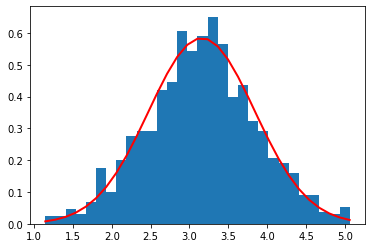

In [5]:
gaussian('AUY')

In [44]:
#https://math.stackexchange.com/questions/2330873/geometric-laplace-distribution
#with 𝜎 scale factor, 𝑑𝑡 time step, 𝑟 interest rate and 𝑓𝐿 a RNG with Laplace distribution (from numpy.random in python). In code this gives me what I expect:
#1.75 fed funds rate right now (since October 31, 2019)
def laplaceMA(ticker):
    '''Input ticker and receives loc and disp variables. These are the most recent 
    closing price or price and disp is standard deviation in this case. A laplace
    distribution is outputted.'''
    start =  dt.datetime(2016,1,1)
    end = dt.datetime.now()
    df = web.DataReader(ticker,'yahoo',start,end)
    df_recent = df.tail(1)
    #loc is the most recent close
    loc = (df_recent['Adj Close'].mean())
    #loc = location
    #scale = disp = dispersion ... wasn't sure but I think this means standard deviation for stocks
    dfYear = df.tail(252)
    #disp is the standard deviation in the past year of the equity
    #for this one we will try the MA
    disp = (dfYear['Adj Close'].mean())
    #let the yearly standard deviation equal dispersion(in this case standard deviation)
    s = np.random.laplace(loc,disp,1000)
    count, bins, ignored = plt.hist(s, 30, density=True)
    x = np.arange(-8., 8., .01)
    pdf = np.exp(-abs(x-loc)/disp)/(2.*disp)
    plt.plot(x, pdf)

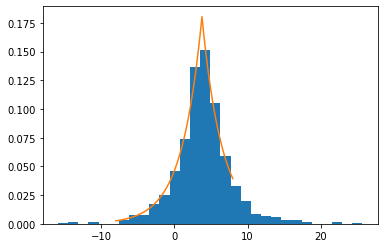

In [45]:
laplaceMA('AUY')

In [46]:
#https://math.stackexchange.com/questions/2330873/geometric-laplace-distribution
#with 𝜎 scale factor, 𝑑𝑡 time step, 𝑟 interest rate and 𝑓𝐿 a RNG with Laplace distribution (from numpy.random in python). In code this gives me what I expect:
#1.75 fed funds rate right now (since October 31, 2019)
def laplaceReturns(ticker):
    '''Input ticker and receives loc and disp variables. These are the most recent 
    closing price or price and disp is standard deviation in this case. A laplace
    distribution is outputted.'''
    start =  dt.datetime(2016,1,1)
    end = dt.datetime.now()
    df = web.DataReader(ticker,'yahoo',start,end)
    df_recent = df.tail(1)
    #loc is the most recent close
    loc = (df_recent['Adj Close'].mean())
    #loc = location
    #scale = disp = dispersion ... wasn't sure but I think this means standard deviation for stocks
    dfYear = df.tail(252)
    #disp is the standard deviation in the past year of the equity
    #for this one it will be returns 
    dfinitial = dfYear.head(1)
    dfinitialAdjClose = (dfinitial['Adj Close'].mean())
    disp = (100*(loc - dfinitialAdjClose)/dfinitialAdjClose)
    #let the yearly standard deviation equal dispersion(in this case standard deviation)
    s = np.random.laplace(loc,disp,1000)
    count, bins, ignored = plt.hist(s, 30, density=True)
    x = np.arange(-8., 8., .01)
    pdf = np.exp(-abs(x-loc)/disp)/(2.*disp)
    plt.plot(x, pdf)

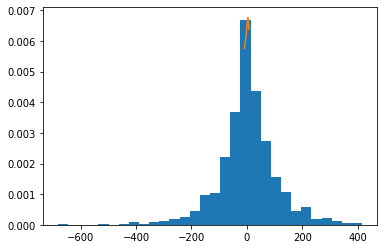

In [47]:
laplaceReturns('AUY')

In [1]:
#https://math.stackexchange.com/questions/2330873/geometric-laplace-distribution
#with 𝜎 scale factor, 𝑑𝑡 time step, 𝑟 interest rate and 𝑓𝐿 a RNG with Laplace distribution (from numpy.random in python). In code this gives me what I expect:
#1.75 fed funds rate right now (since October 31, 2019)
def laplaceVol(ticker):
    '''Input ticker and receives loc and disp variables. These are the most recent 
    closing price or price and disp is standard deviation in this case. A laplace
    distribution is outputted.'''
    start =  dt.datetime(2016,1,1)
    end = dt.datetime.now()
    df = web.DataReader(ticker,'yahoo',start,end)
    df_recent = df.tail(1)
    #loc is the most recent close
    loc = (df_recent['Adj Close'].mean())
    #loc = location
    #scale = disp = dispersion ... wasn't sure but I think this means standard deviation for stocks
    dfYear = df.tail(252)
    #disp is the standard deviation in the past year of the equity
    disp = (dfYear['Adj Close'].std())
    #let the yearly standard deviation equal dispersion(in this case standard deviation)
    s = np.random.laplace(loc,disp,1000)
    count, bins, ignored = plt.hist(s, 30, density=True)
    x = np.arange(-8., 8., .01)
    pdf = np.exp(-abs(x-loc)/disp)/(2.*disp)
    plt.plot(x, pdf)
    #plot gaussian for comparison
    '''
    g = (1/(disp * np.sqrt(2 * np.pi)) * np.exp(-(x - loc)**2 / (2 * disp**2)))
    plt.plot(x,g)
    '''

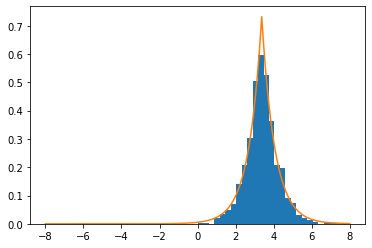

In [6]:
laplaceVol('AUY')